SCENARIO 1: PARAMETRIC BOOTSTRAPPING - SUPPLIER LEAD TIMES
Original dataset size: 50 lead time observations
Mean lead time: 7.23 days
Std lead time: 3.59 days

Fitted parameters:
Shape: 4.04, Scale: 1.79


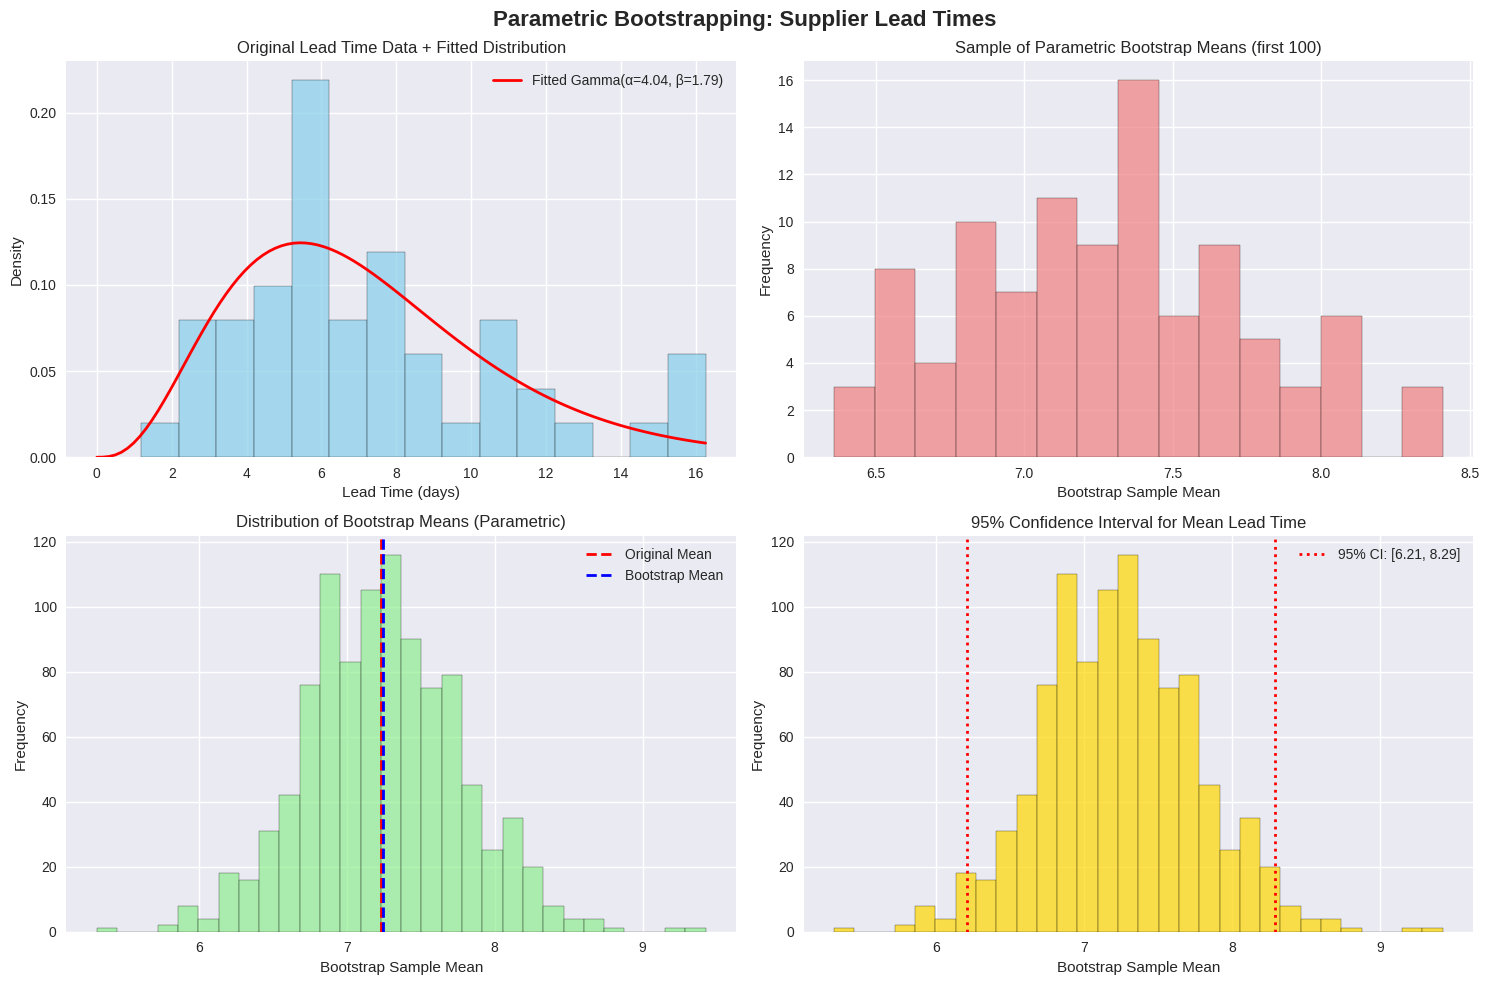


Parametric Bootstrap Results:
Bootstrap mean estimate: 7.25 days
Bootstrap std estimate: 0.52 days
95% Confidence Interval: [6.21, 8.29] days


In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from sklearn.utils import resample
import warnings
warnings.filterwarnings('ignore')

# Set style for better plots
plt.style.use('seaborn-v0_8')
sns.set_palette("husl")

# Set random seed for reproducibility
np.random.seed(42)

# ============================================================================
# SCENARIO 1: PARAMETRIC BOOTSTRAPPING - SUPPLIER LEAD TIMES
# ============================================================================

print("=" * 60)
print("SCENARIO 1: PARAMETRIC BOOTSTRAPPING - SUPPLIER LEAD TIMES")
print("=" * 60)

# Generate realistic supplier lead time data (gamma distribution)
# Shape parameter (k) and scale parameter (theta)
true_shape, true_scale = 2.5, 3.0
original_lead_times = np.random.gamma(true_shape, true_scale, size=50)

print(f"Original dataset size: {len(original_lead_times)} lead time observations")
print(f"Mean lead time: {np.mean(original_lead_times):.2f} days")
print(f"Std lead time: {np.std(original_lead_times):.2f} days")

# Fit gamma distribution to our observed data
fitted_shape, fitted_loc, fitted_scale = stats.gamma.fit(original_lead_times, floc=0)

print(f"\nFitted parameters:")
print(f"Shape: {fitted_shape:.2f}, Scale: {fitted_scale:.2f}")

# Generate parametric bootstrap samples
n_bootstrap = 1000
bootstrap_means_parametric = []

for i in range(n_bootstrap):
    # Generate new sample from fitted distribution
    bootstrap_sample = np.random.gamma(fitted_shape, fitted_scale, size=len(original_lead_times))
    bootstrap_means_parametric.append(np.mean(bootstrap_sample))

bootstrap_means_parametric = np.array(bootstrap_means_parametric)

# Visualization for Parametric Bootstrap
fig, axes = plt.subplots(2, 2, figsize=(15, 10))
fig.suptitle('Parametric Bootstrapping: Supplier Lead Times', fontsize=16, fontweight='bold')

# Original data histogram
axes[0,0].hist(original_lead_times, bins=15, alpha=0.7, density=True, color='skyblue', edgecolor='black')
x_range = np.linspace(0, max(original_lead_times), 100)
fitted_pdf = stats.gamma.pdf(x_range, fitted_shape, scale=fitted_scale)
axes[0,0].plot(x_range, fitted_pdf, 'r-', linewidth=2, label=f'Fitted Gamma(α={fitted_shape:.2f}, β={fitted_scale:.2f})')
axes[0,0].set_title('Original Lead Time Data + Fitted Distribution')
axes[0,0].set_xlabel('Lead Time (days)')
axes[0,0].set_ylabel('Density')
axes[0,0].legend()

# Sample of parametric bootstrap samples
axes[0,1].hist(bootstrap_means_parametric[:100], bins=15, alpha=0.7, color='lightcoral', edgecolor='black')
axes[0,1].set_title('Sample of Parametric Bootstrap Means (first 100)')
axes[0,1].set_xlabel('Bootstrap Sample Mean')
axes[0,1].set_ylabel('Frequency')

# Bootstrap distribution of means
axes[1,0].hist(bootstrap_means_parametric, bins=30, alpha=0.7, color='lightgreen', edgecolor='black')
axes[1,0].axvline(np.mean(original_lead_times), color='red', linestyle='--', linewidth=2, label='Original Mean')
axes[1,0].axvline(np.mean(bootstrap_means_parametric), color='blue', linestyle='--', linewidth=2, label='Bootstrap Mean')
axes[1,0].set_title('Distribution of Bootstrap Means (Parametric)')
axes[1,0].set_xlabel('Bootstrap Sample Mean')
axes[1,0].set_ylabel('Frequency')
axes[1,0].legend()

# Confidence interval
ci_lower = np.percentile(bootstrap_means_parametric, 2.5)
ci_upper = np.percentile(bootstrap_means_parametric, 97.5)
axes[1,1].hist(bootstrap_means_parametric, bins=30, alpha=0.7, color='gold', edgecolor='black')
axes[1,1].axvline(ci_lower, color='red', linestyle=':', linewidth=2, label=f'95% CI: [{ci_lower:.2f}, {ci_upper:.2f}]')
axes[1,1].axvline(ci_upper, color='red', linestyle=':', linewidth=2)
axes[1,1].set_title('95% Confidence Interval for Mean Lead Time')
axes[1,1].set_xlabel('Bootstrap Sample Mean')
axes[1,1].set_ylabel('Frequency')
axes[1,1].legend()

plt.tight_layout()
plt.show()

print(f"\nParametric Bootstrap Results:")
print(f"Bootstrap mean estimate: {np.mean(bootstrap_means_parametric):.2f} days")
print(f"Bootstrap std estimate: {np.std(bootstrap_means_parametric):.2f} days")
print(f"95% Confidence Interval: [{ci_lower:.2f}, {ci_upper:.2f}] days")




SCENARIO 2: NON-PARAMETRIC BOOTSTRAPPING - DEMAND PATTERNS
Original demand dataset size: 100 observations
Mean demand: 75.82 units
Std demand: 16.95 units


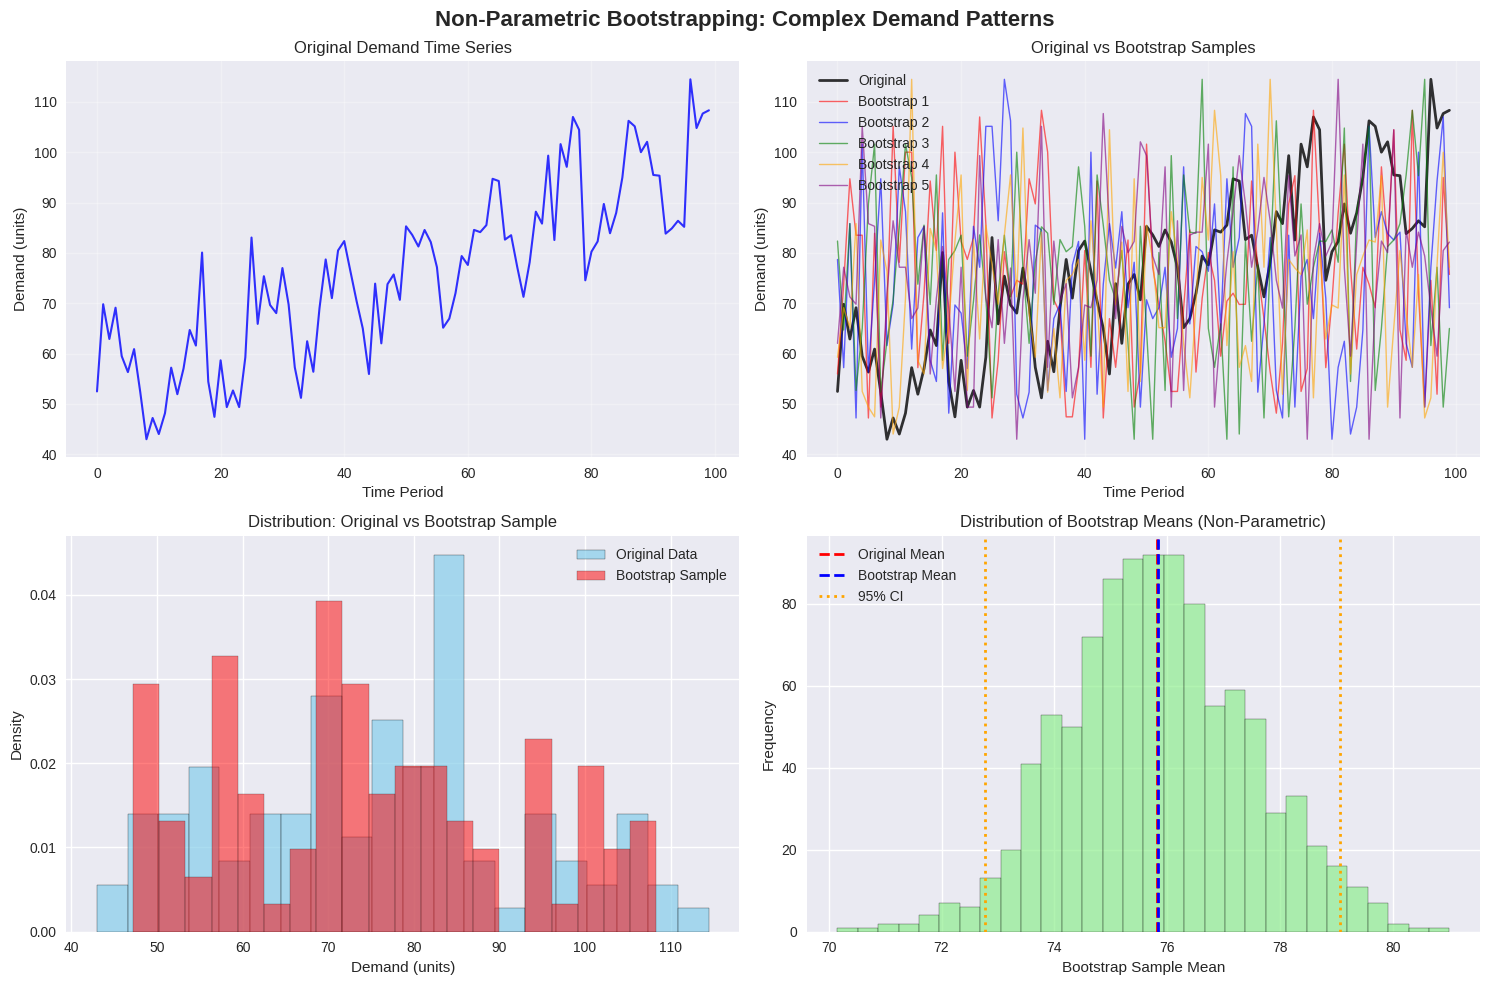


Non-Parametric Bootstrap Results:
Bootstrap mean estimate: 75.83 units
Bootstrap std estimate: 1.63 units
95% Confidence Interval: [72.78, 79.07] units


In [2]:
# ============================================================================
# SCENARIO 2: NON-PARAMETRIC BOOTSTRAPPING - DEMAND PATTERNS
# ============================================================================

print("\n" + "=" * 70)
print("SCENARIO 2: NON-PARAMETRIC BOOTSTRAPPING - DEMAND PATTERNS")
print("=" * 70)

# Generate complex demand data with seasonality, trends, and noise
np.random.seed(42)
time_points = np.arange(100)
seasonal_component = 10 * np.sin(2 * np.pi * time_points / 12)  # Monthly seasonality
trend_component = 0.5 * time_points  # Growing trend
noise_component = np.random.normal(0, 5, 100)
promotional_spikes = np.random.choice([0, 0, 0, 0, 15], 100)  # Random promotional effects

original_demand = 50 + seasonal_component + trend_component + noise_component + promotional_spikes
original_demand = np.maximum(original_demand, 0)  # Demand can't be negative

print(f"Original demand dataset size: {len(original_demand)} observations")
print(f"Mean demand: {np.mean(original_demand):.2f} units")
print(f"Std demand: {np.std(original_demand):.2f} units")

# Non-parametric bootstrap sampling
n_bootstrap = 1000
bootstrap_means_nonparametric = []
bootstrap_samples_showcase = []

for i in range(n_bootstrap):
    # Resample with replacement from original data
    bootstrap_sample = resample(original_demand, n_samples=len(original_demand), random_state=i)
    bootstrap_means_nonparametric.append(np.mean(bootstrap_sample))

    # Store first few samples for visualization
    if i < 5:
        bootstrap_samples_showcase.append(bootstrap_sample)

bootstrap_means_nonparametric = np.array(bootstrap_means_nonparametric)

# Visualization for Non-Parametric Bootstrap
fig, axes = plt.subplots(2, 2, figsize=(15, 10))
fig.suptitle('Non-Parametric Bootstrapping: Complex Demand Patterns', fontsize=16, fontweight='bold')

# Original time series
axes[0,0].plot(time_points, original_demand, 'b-', alpha=0.8, linewidth=1.5)
axes[0,0].set_title('Original Demand Time Series')
axes[0,0].set_xlabel('Time Period')
axes[0,0].set_ylabel('Demand (units)')
axes[0,0].grid(True, alpha=0.3)

# Few bootstrap samples overlaid
axes[0,1].plot(time_points, original_demand, 'k-', linewidth=2, alpha=0.8, label='Original')
colors = ['red', 'blue', 'green', 'orange', 'purple']
for i, (sample, color) in enumerate(zip(bootstrap_samples_showcase, colors)):
    axes[0,1].plot(time_points, sample, color=color, alpha=0.6, linewidth=1, label=f'Bootstrap {i+1}')
axes[0,1].set_title('Original vs Bootstrap Samples')
axes[0,1].set_xlabel('Time Period')
axes[0,1].set_ylabel('Demand (units)')
axes[0,1].legend()
axes[0,1].grid(True, alpha=0.3)

# Distribution comparison
axes[1,0].hist(original_demand, bins=20, alpha=0.7, density=True, color='skyblue',
               edgecolor='black', label='Original Data')
# Show distribution of one bootstrap sample for comparison
axes[1,0].hist(bootstrap_samples_showcase[0], bins=20, alpha=0.5, density=True,
               color='red', edgecolor='black', label='Bootstrap Sample')
axes[1,0].set_title('Distribution: Original vs Bootstrap Sample')
axes[1,0].set_xlabel('Demand (units)')
axes[1,0].set_ylabel('Density')
axes[1,0].legend()

# Bootstrap means distribution
axes[1,1].hist(bootstrap_means_nonparametric, bins=30, alpha=0.7, color='lightgreen', edgecolor='black')
axes[1,1].axvline(np.mean(original_demand), color='red', linestyle='--', linewidth=2, label='Original Mean')
axes[1,1].axvline(np.mean(bootstrap_means_nonparametric), color='blue', linestyle='--', linewidth=2, label='Bootstrap Mean')
ci_lower_np = np.percentile(bootstrap_means_nonparametric, 2.5)
ci_upper_np = np.percentile(bootstrap_means_nonparametric, 97.5)
axes[1,1].axvline(ci_lower_np, color='orange', linestyle=':', linewidth=2, label=f'95% CI')
axes[1,1].axvline(ci_upper_np, color='orange', linestyle=':', linewidth=2)
axes[1,1].set_title('Distribution of Bootstrap Means (Non-Parametric)')
axes[1,1].set_xlabel('Bootstrap Sample Mean')
axes[1,1].set_ylabel('Frequency')
axes[1,1].legend()

plt.tight_layout()
plt.show()

print(f"\nNon-Parametric Bootstrap Results:")
print(f"Bootstrap mean estimate: {np.mean(bootstrap_means_nonparametric):.2f} units")
print(f"Bootstrap std estimate: {np.std(bootstrap_means_nonparametric):.2f} units")
print(f"95% Confidence Interval: [{ci_lower_np:.2f}, {ci_upper_np:.2f}] units")




COMPARISON: PARAMETRIC vs NON-PARAMETRIC


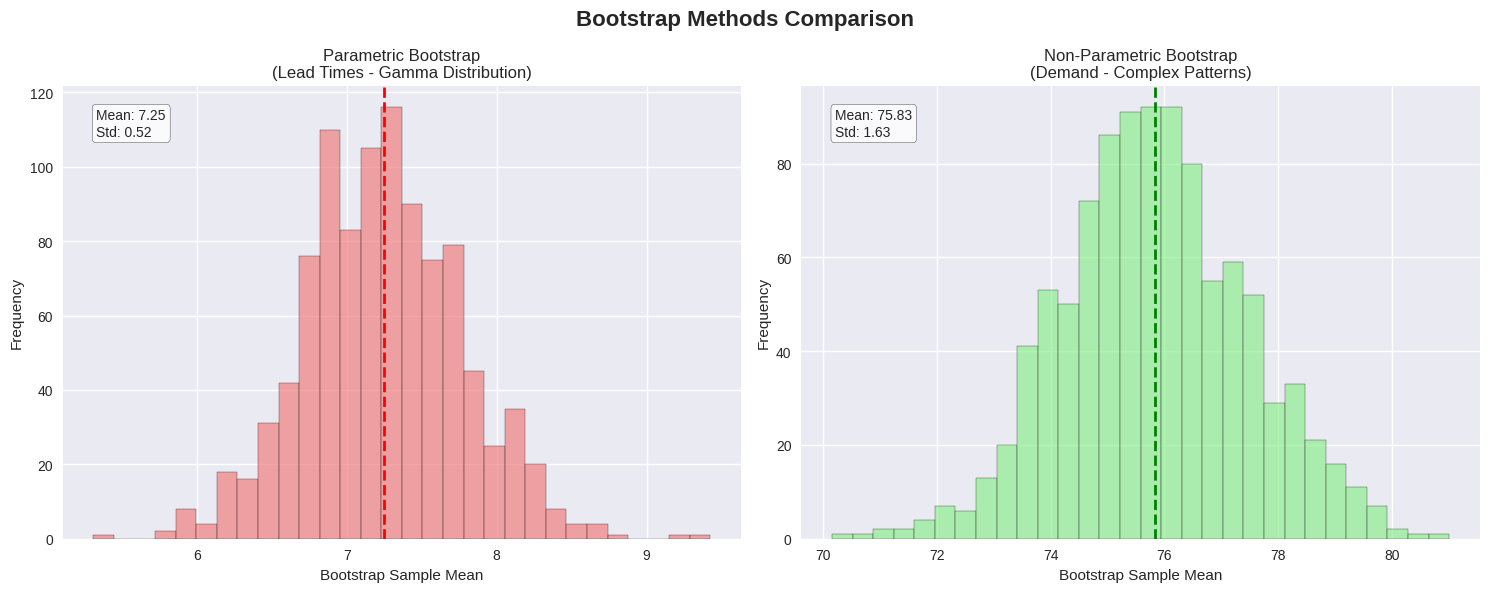


Summary Comparison:
                 Method  Original Mean  Bootstrap Mean  Bootstrap Std  CI Lower  CI Upper  CI Width
Parametric (Lead Times)           7.23            7.25           0.52      6.21      8.29      2.08
Non-Parametric (Demand)          75.82           75.83           1.63     72.78     79.07      6.30

KEY INSIGHTS:
1. PARAMETRIC BOOTSTRAP (Lead Times):
   - Assumes gamma distribution for lead times
   - Generates smooth, theoretically consistent samples
   - More efficient with small datasets
   - Risk: Wrong distributional assumption can bias results

2. NON-PARAMETRIC BOOTSTRAP (Demand):
   - No distributional assumptions
   - Preserves complex patterns (seasonality, promotions, outliers)
   - Robust to unknown data structures
   - Limitation: Can't extrapolate beyond observed data range

3. PRACTICAL IMPLICATIONS:
   - Parametric CI width: 2.08 (narrower, more precise)
   - Non-parametric CI width: 6.30 (wider, more honest uncertainty)
   - Choice depends on domai

In [3]:
# ============================================================================
# COMPARISON: PARAMETRIC vs NON-PARAMETRIC
# ============================================================================

print("\n" + "=" * 50)
print("COMPARISON: PARAMETRIC vs NON-PARAMETRIC")
print("=" * 50)

# Create a side-by-side comparison
fig, axes = plt.subplots(1, 2, figsize=(15, 6))
fig.suptitle('Bootstrap Methods Comparison', fontsize=16, fontweight='bold')

# Parametric results
axes[0].hist(bootstrap_means_parametric, bins=30, alpha=0.7, color='lightcoral',
             edgecolor='black', label='Parametric Bootstrap')
axes[0].axvline(np.mean(bootstrap_means_parametric), color='red', linestyle='--', linewidth=2)
axes[0].set_title('Parametric Bootstrap\n(Lead Times - Gamma Distribution)')
axes[0].set_xlabel('Bootstrap Sample Mean')
axes[0].set_ylabel('Frequency')
axes[0].text(0.05, 0.95, f'Mean: {np.mean(bootstrap_means_parametric):.2f}\nStd: {np.std(bootstrap_means_parametric):.2f}',
             transform=axes[0].transAxes, verticalalignment='top',
             bbox=dict(boxstyle='round', facecolor='white', alpha=0.8))

# Non-parametric results
axes[1].hist(bootstrap_means_nonparametric, bins=30, alpha=0.7, color='lightgreen',
             edgecolor='black', label='Non-Parametric Bootstrap')
axes[1].axvline(np.mean(bootstrap_means_nonparametric), color='green', linestyle='--', linewidth=2)
axes[1].set_title('Non-Parametric Bootstrap\n(Demand - Complex Patterns)')
axes[1].set_xlabel('Bootstrap Sample Mean')
axes[1].set_ylabel('Frequency')
axes[1].text(0.05, 0.95, f'Mean: {np.mean(bootstrap_means_nonparametric):.2f}\nStd: {np.std(bootstrap_means_nonparametric):.2f}',
             transform=axes[1].transAxes, verticalalignment='top',
             bbox=dict(boxstyle='round', facecolor='white', alpha=0.8))

plt.tight_layout()
plt.show()

# Summary statistics
summary_data = {
    'Method': ['Parametric (Lead Times)', 'Non-Parametric (Demand)'],
    'Original Mean': [np.mean(original_lead_times), np.mean(original_demand)],
    'Bootstrap Mean': [np.mean(bootstrap_means_parametric), np.mean(bootstrap_means_nonparametric)],
    'Bootstrap Std': [np.std(bootstrap_means_parametric), np.std(bootstrap_means_nonparametric)],
    'CI Lower': [ci_lower, ci_lower_np],
    'CI Upper': [ci_upper, ci_upper_np],
    'CI Width': [ci_upper - ci_lower, ci_upper_np - ci_lower_np]
}

summary_df = pd.DataFrame(summary_data)
print("\nSummary Comparison:")
print(summary_df.round(2).to_string(index=False))

print(f"\n" + "=" * 80)
print("KEY INSIGHTS:")
print("=" * 80)
print("1. PARAMETRIC BOOTSTRAP (Lead Times):")
print("   - Assumes gamma distribution for lead times")
print("   - Generates smooth, theoretically consistent samples")
print("   - More efficient with small datasets")
print("   - Risk: Wrong distributional assumption can bias results")

print("\n2. NON-PARAMETRIC BOOTSTRAP (Demand):")
print("   - No distributional assumptions")
print("   - Preserves complex patterns (seasonality, promotions, outliers)")
print("   - Robust to unknown data structures")
print("   - Limitation: Can't extrapolate beyond observed data range")

print(f"\n3. PRACTICAL IMPLICATIONS:")
print(f"   - Parametric CI width: {ci_upper - ci_lower:.2f} (narrower, more precise)")
print(f"   - Non-parametric CI width: {ci_upper_np - ci_lower_np:.2f} (wider, more honest uncertainty)")
print(f"   - Choice depends on domain knowledge and data characteristics")